In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (2).csv


In [ ]:
toyota=pd.read_csv('ToyotaCorolla (2).csv')
toyota.shape

(1436, 38)

In [ ]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [ ]:
toyota = toyota[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [ ]:
toyota['Doors'].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

In [ ]:
toyota = toyota.rename({'Price':'price', 'Age_08_04':'age', 'KM':'km', 'HP':'hp', 'Doors':'doors',
                        'Gears':'gears', 'Quarterly_Tax':'qt', 'Weight':'weight'}, axis=1)
toyota.columns

Index(['price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'qt', 'weight'], dtype='object')

In [ ]:
toyota[toyota.duplicated()]

,price,age,km,hp,cc,doors,gears,qt,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyota.shape

(1436, 9)

In [ ]:
toyota = toyota.drop_duplicates()
toyota.shape

(1435, 9)

In [ ]:
#Collinearity Problem Check
# Calculate VIF
rsq_age=smf.ols('age~km+hp+cc+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('km~age+hp+cc+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('hp~age+km+cc+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~age+km+hp+doors+gears+qt+weight',data=toyota).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('doors~age+km+hp+cc+gears+qt+weight',data=toyota).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('gears~age+km+hp+cc+doors+qt+weight',data=toyota).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('qt~age+km+hp+cc+doors+gears+weight',data=toyota).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('weight~age+km+hp+cc+doors+gears+qt',data=toyota).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


Sice vif<20, for all variables, No collinearity found among independent variables

In [ ]:
#sns.set_style(style='darkgrid')
#sns.pairplot(toyota_2)

In [ ]:
import statsmodels.formula.api as smf 
model = smf.ols('price~age+km+hp+doors+gears+weight+cc+qt',data=toyota).fit()

In [ ]:
model.params 

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
doors          -0.920189
gears         597.715894
weight         16.855470
cc             -0.118558
qt              3.858805
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.875273
age         -46.551876
km          -16.552424
hp           11.209719
doors        -0.023012
gears         3.034563
weight       15.760663
cc           -1.316436
qt            2.944198
dtype: float64 
 Intercept     1.113392e-04
age          1.879217e-288
km            1.994713e-56
hp            5.211155e-28
doors         9.816443e-01
gears         2.452430e-03
weight        1.031118e-51
cc            1.882393e-01
qt            3.290363e-03
dtype: float64


In [ ]:
print('R2 =',model.rsquared*100, '\n'
      'R2 Adj. = ',model.rsquared_adj*100)

R2 = 86.25200256947001 
R2 Adj. =  86.17487495415148


In [ ]:
# Model Deleting Diagnostics (detecting outliers and influencer)
#Cook's Distance

from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

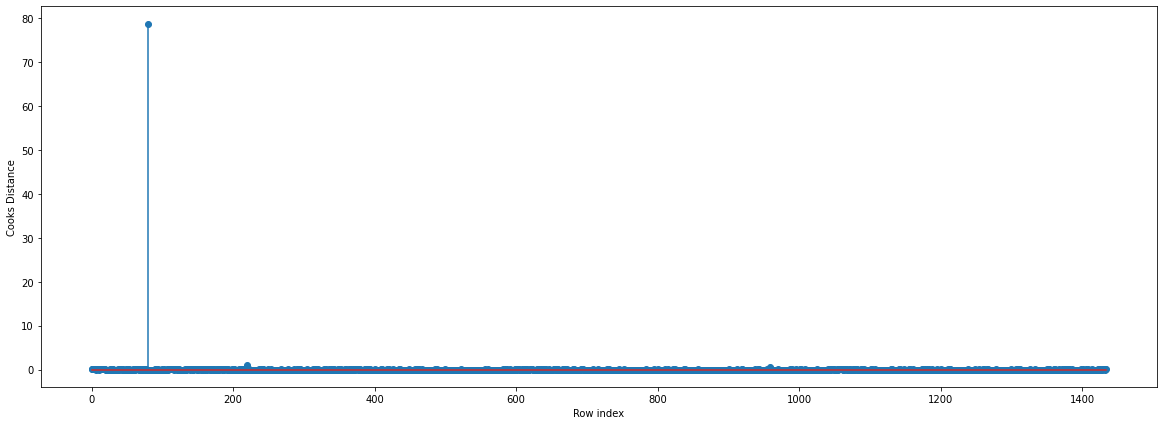

In [ ]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582255153)

In [ ]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

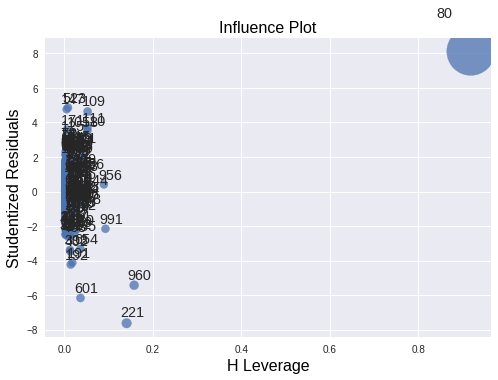

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
plt.style.use('seaborn')

influence_plot(model,alhpa=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [ ]:
# From the above plot, it is evident that data point 80 is the influencer
toyota[toyota.index.isin([80])]

,price,age,km,hp,cc,doors,gears,qt,weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
toyota.shape

(1435, 9)

In [ ]:
#Discard the data points which are influencers and re-asign the row number (reset_index())
toyota_1=toyota.drop(toyota.index[[80]],axis=0).reset_index()
toyota_1.shape

(1434, 10)

In [ ]:
toyota_1.columns

Index(['index', 'price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'qt',
       'weight'],
      dtype='object')

In [ ]:
#Drop the original index
toyota_1=toyota_1.drop(['index'],axis=1)
toyota_1.shape

(1434, 9)

In [ ]:
#Building the Model again

model_1= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_1).fit()
print('R2 =',model_1.rsquared*100, '\n'
      'R2 Adj. = ',model_1.rsquared_adj*100)

R2 = 86.81163912634055 
R2 Adj. =  86.73759920564632


In [ ]:
#Cook's Distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence_1 = model_1.get_influence()
(c, _) = model_influence_1.cooks_distance

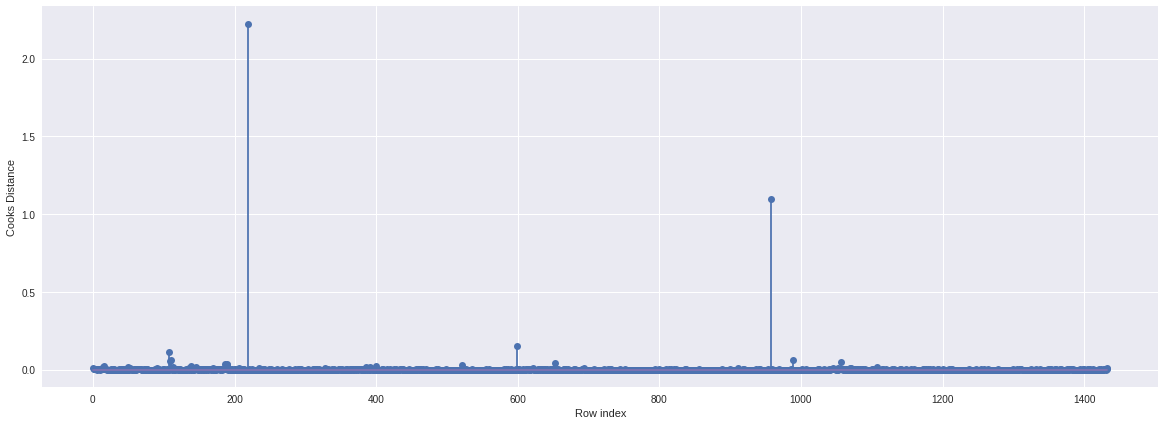

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(219, 2.225351365527639)

In [ ]:
k = toyota_1.shape[1]
n = toyota_1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02092050209205021

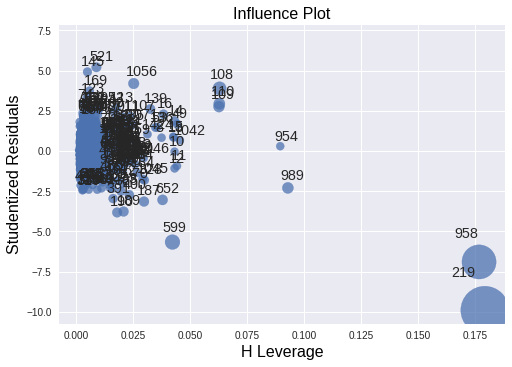

In [ ]:
plt.style.use('seaborn')
influence_plot(model_1,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [ ]:
toyota_1[toyota_1.index.isin([219,958])]

,price,age,km,hp,cc,doors,gears,qt,weight
219,12450,44,74172,110,1600,5,5,163,1615
958,9390,66,50806,86,1300,3,5,19,1480


In [ ]:
#Discard the data points which are influencers and re-asign the row number (reset_index())
toyota_2=toyota_1.drop(toyota_1.index[[219,958]],axis=0).reset_index()
toyota_2.shape

(1432, 10)

In [ ]:
#Drop the original index
toyota_2=toyota_2.drop(['index'],axis=1)
toyota_2.columns

Index(['price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'qt', 'weight'], dtype='object')

In [ ]:
model_2= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_2).fit()
print('R2 =',model_2.rsquared*100, '\n'
      'R2 Adj. = ',model_2.rsquared_adj*100)

R2 = 88.39684606741538 
R2 Adj. =  88.33161400033129


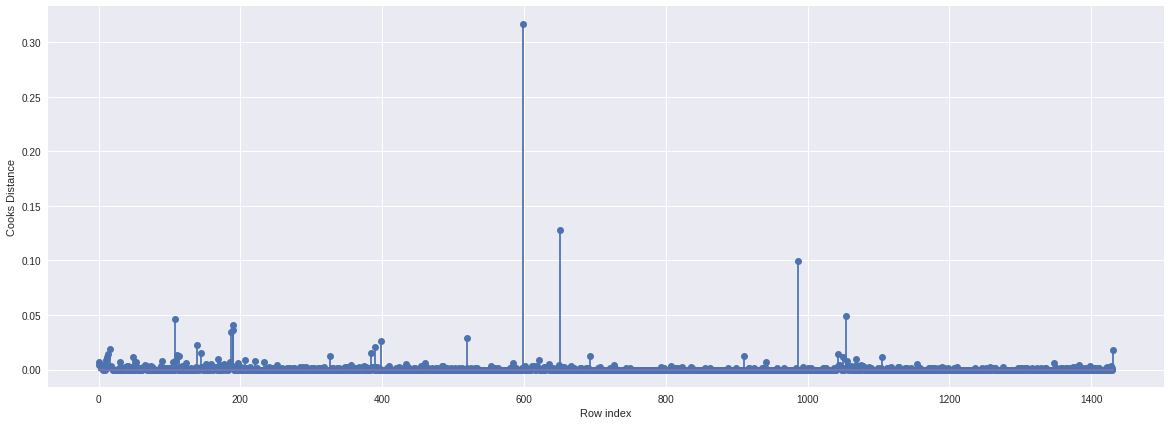

In [ ]:
#Cooks Distance
model_influence_2 = model_2.get_influence()
(c, _) = model_influence_2.cooks_distance
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(598, 0.31689035401448773)

In [ ]:
k = toyota_2.shape[1]
n = toyota_2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02094972067039106

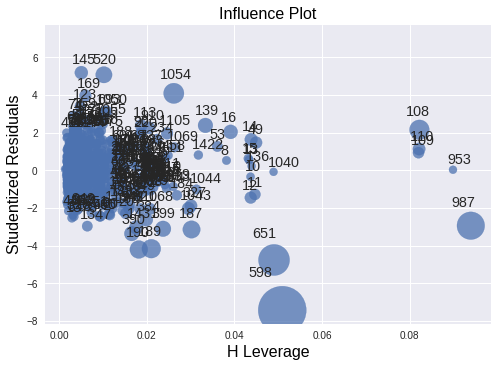

In [ ]:
plt.style.use('seaborn')
influence_plot(model_2,alhpa=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [ ]:
toyota_2[toyota_2.index.isin([598])]

,price,age,km,hp,cc,doors,gears,qt,weight
598,7500,50,1,90,2000,3,5,64,1260


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota_3=toyota_2.drop(toyota_2.index[[598]],axis=0).reset_index()
toyota_3.shape

(1431, 10)

In [ ]:
#Drop the original index
toyota_3=toyota_3.drop(['index'],axis=1)
toyota_3.columns

Index(['price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'qt', 'weight'], dtype='object')

In [ ]:
model_3= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_3).fit()
print('R2 =',model_3.rsquared*100, '\n'
      'R2 Adj. = ',model_3.rsquared_adj*100)

R2 = 88.82395145171203 
R2 Adj. =  88.76107635439396


In [ ]:
df1 = toyota_3.pop('price')
toyota_3['price']=df1
toyota_3.columns

Index(['age', 'km', 'hp', 'cc', 'doors', 'gears', 'qt', 'weight', 'price'], dtype='object')

In [ ]:
#Final Model
model_3= smf.ols('price~age+hp+km+doors+gears+weight+cc+qt',data = toyota_3).fit()
print('R2 =',model_3.rsquared*100, '\n'
      'R2 Adj. = ',model_3.rsquared_adj*100)

R2 = 88.82395145171203 
R2 Adj. =  88.76107635439396


In [ ]:
#Predecting the new data
#New data for prediction
new_data=pd.DataFrame({'age': 23,"hp":90,'km':40000, "doors":5,"gears":5, 'weight':1200, 'cc':1600,'qt':70}, index=[1])

In [ ]:
pred_y = model_3.predict(new_data)
pred_y

1    18267.376865
dtype: float64

In [ ]:
# Automatic Prediction of Price
pred_y=model_3.predict(toyota)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1431     9161.230587
1432     8536.091326
1433     8681.531063
1434     8793.668694
1435    10860.695492
Length: 1435, dtype: float64